# This example appliess a **logistic regression model** for binary classification, on the *iris* dataset.

Since this dataset considers three different classes

*   0.0 for iris setosa
*   1.0 for iris versicolor
*   2.0 for iris virginica

We firstly must reformulate the problem as a **binary classification task**: we will focus the task on classifying new instances as *iris virginica* (positive class: 1) or *not iris virginica* (negative class: 0).

In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris["data"][:,:]
y = (iris["target"] == 2).astype(int)

#OPTIONAL CODE: Convert the iris dataset inton a Pandas DataFrame structure to view it nicely
dfiris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dfiris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# @title LogReg from scratch (MSE)
class LogisticRegressionScratchMSE:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        probs = self.sigmoid(z)

        # Return the class with the highest probability
        return np.where(probs >= 0.5, 1, 0)

    def initialize_weights(self, n_features):
        self.w = np.zeros((n_features, 1))  # Init with the same column number as feature
        self.b = 0

    def cost_function(self, h, y):
        m = len(y)
        # reg_term = (0.01 / (2 * m)) * np.sum(self.w ** 2)
        cost = (1/m) * np.sum((h - y)**2)

        return cost #+ reg_term

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
        print(X.shape, y.shape)
        m = len(y)
        n_features = X.shape[1]
        self.initialize_weights(n_features)

        for i in range(self.num_iterations):
            # Forward prop
            probs = self.predict(X)

            # Cost
            # error = -(1 / m) * np.sum(y * np.log(probs + 1e-8) + (1 - y) * np.log(1 - probs + 1e-8))
            error = self.cost_function(probs, y)
            self.losses.append(error)

            # Calculate the gradient of the error with respect to the weights
            gradient_w = (1 / m) * np.dot(X.T, (probs - y))
            gradient_b = (1 / m) * np.sum(probs - y)

            # Update the weights using the gradient and the learning rate
            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b

            # cost compute if more iteration (optional)
            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {error}")

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(range(self.num_iterations), self.losses, label='MSE Loss')
        plt.xlabel("Iteration")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss Curve: Logistic Regression (MSE)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


(150, 4) (150, 1)
Iteration 0, Cost: 0.6666666666666667
Iteration 100, Cost: 0.2066666666666667
Iteration 200, Cost: 0.03333333333333333
Iteration 300, Cost: 0.013333333333333334
Iteration 400, Cost: 0.013333333333333334
Iteration 500, Cost: 0.03333333333333333
Iteration 600, Cost: 0.02
Iteration 700, Cost: 0.02
Iteration 800, Cost: 0.013333333333333334
Iteration 900, Cost: 0.013333333333333334


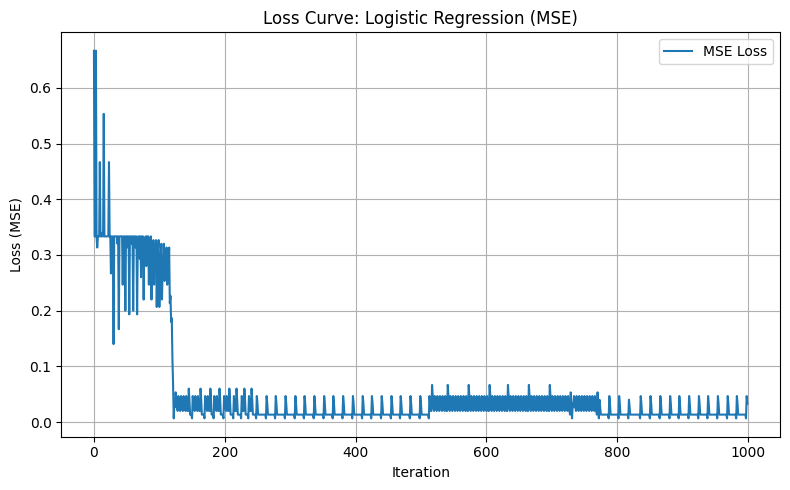

In [4]:
# Train Logistic Regression from scratch
MSEmodel_scratch = LogisticRegressionScratchMSE(learning_rate=1e-2, num_iterations=1000)
MSEmodel_scratch.fit(X, y)

# Predict and evaluate
MSEpred_scratch = MSEmodel_scratch.predict(X)
MSEmodel_scratch.plot_loss()

In [5]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
score = accuracy_score(y, MSEpred_scratch)
score

0.9866666666666667

In [6]:
X_sampling = ([[7.7, 3.1, 6.4, 1.8],
      [5.8, 2.4, 4.6, 1.4]])
sampling_pred_scratch = MSEmodel_scratch.predict(X_sampling)
sampling_pred_scratch

array([[1],
       [0]])

In [7]:
# @title LogReg from scratch (BCE)
class LogisticRegressionScratchBCE:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        probs = self.sigmoid(z)

        # Return the class with the highest probability
        return np.where(probs >= 0.5, 1, 0)

    def initialize_weights(self, n_features):
        self.w = np.zeros((n_features, 1))  # Init with the same column number as feature
        self.b = 0

    def cost_function(self, h, y):
        m = len(y)
        # reg_term = (0.01 / (2 * m)) * np.sum(self.w ** 2)
        cost = -(1 / m) * np.sum(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))

        return cost #+ reg_term

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
        print(X.shape, y.shape)
        m = len(y)
        n_features = X.shape[1]
        self.initialize_weights(n_features)

        for i in range(self.num_iterations):
            # Forward prop
            probs = self.predict(X)

            # Cost
            # error = -(1 / m) * np.sum(y * np.log(probs + 1e-8) + (1 - y) * np.log(1 - probs + 1e-8))
            error = self.cost_function(probs, y)
            self.losses.append(error)

            # Calculate the gradient of the error with respect to the weights
            gradient_w = (1 / m) * np.dot(X.T, (probs - y))
            gradient_b = (1 / m) * np.sum(probs - y)

            # Update the weights using the gradient and the learning rate
            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b

            # cost compute if more iteration (optional)
            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {error}")

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(range(self.num_iterations), self.losses, label='MSE Loss')
        plt.xlabel("Iteration")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss Curve: Logistic Regression (BCE)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


(150, 4) (150, 1)
Iteration 0, Cost: 12.280453825968246
Iteration 100, Cost: 3.8069406791501565
Iteration 200, Cost: 0.6140226817984122
Iteration 300, Cost: 0.24560906671936494
Iteration 400, Cost: 0.24560906671936494
Iteration 500, Cost: 0.6140226817984122
Iteration 600, Cost: 0.3684136050790473
Iteration 700, Cost: 0.3684136050790473
Iteration 800, Cost: 0.24560906671936494
Iteration 900, Cost: 0.24560906671936494


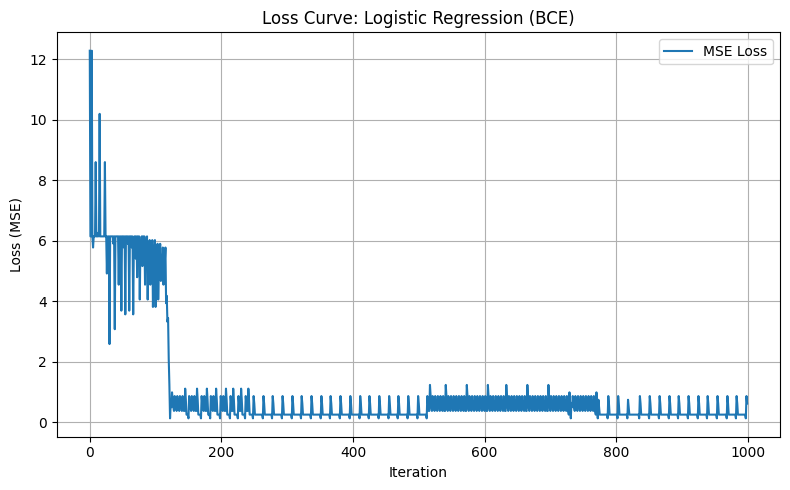

In [8]:
# Train Logistic Regression from scratch
BCEmodel_scratch = LogisticRegressionScratchBCE(learning_rate=1e-3, num_iterations=1000)
BCEmodel_scratch.fit(X, y)

# Predict and evaluate
BCE_pred_scratch = BCEmodel_scratch.predict(X)
BCEmodel_scratch.plot_loss()

In [9]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
score = accuracy_score(y, BCE_pred_scratch)
score

0.9866666666666667

In [10]:
X_sampling = ([[7.7, 3.1, 6.4, 1.8],
      [5.8, 2.4, 4.6, 1.4]])
sampling_pred_scratch = BCEmodel_scratch.predict(X_sampling)
sampling_pred_scratch

array([[1],
       [0]])

In [11]:
# @title LogReg from Scikit-learn API
from sklearn.linear_model import LogisticRegression

X_sc = iris["data"][:,:]
y = (iris["target"] == 2).astype(np.int32)
log_reg = LogisticRegression()
log_reg.fit(X_sc, y)

X_sampling = [[7.7, 3.1, 6.4, 1.8],
              [5.8, 2.4, 4.6, 1.4]]
log_reg.predict(X_sampling)

array([1, 0], dtype=int32)

In [12]:
log_reg.score(X_sc, y)

0.9733333333333334

In [13]:
# Use the trained logistic regression model (log_reg) to predict the probability of each class
# The .predict_proba(X_sampling) method returns an array with 2 columns:
#    - Column 0: Probability that the sample belongs to class 0
#    - Column 1: Probability that the sample belongs to class 1
y_probab = log_reg.predict_proba(X_sampling)
y_probab

array([[0.01711564, 0.98288436],
       [0.74740984, 0.25259016]])

In this second example, we use only one of the four predictor attributes, *petal width*, to predict whether a flower observation with a given petal width would be **iris virgínica** or not.

In [14]:
X = iris["data"][:, 3:] # For next predictions, consider only one attribute: petal width
y = (iris["target"] == 2).astype(np.int32)
X[:10] # Petal width

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1]])

If considering on only *petal width* affect to the type of iris flower dataset

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

We will see that the more petal width is Iris Virginica flower, the less petal wdith is flower out of Iris Virginica class.

In [16]:
X_new = np.linspace(0, 3, 500).reshape(-1, 1)
y_probab = log_reg.predict_proba(X_new)
y_probab[:10]

array([[9.99249051e-01, 7.50949397e-04],
       [9.99229249e-01, 7.70751232e-04],
       [9.99208925e-01, 7.91074809e-04],
       [9.99188066e-01, 8.11933853e-04],
       [9.99166658e-01, 8.33342450e-04],
       [9.99144685e-01, 8.55315053e-04],
       [9.99122134e-01, 8.77866494e-04],
       [9.99098988e-01, 9.01011997e-04],
       [9.99075233e-01, 9.24767180e-04],
       [9.99050852e-01, 9.49148074e-04]])

(np.float64(0.0), np.float64(3.0), np.float64(-0.02), np.float64(1.02))

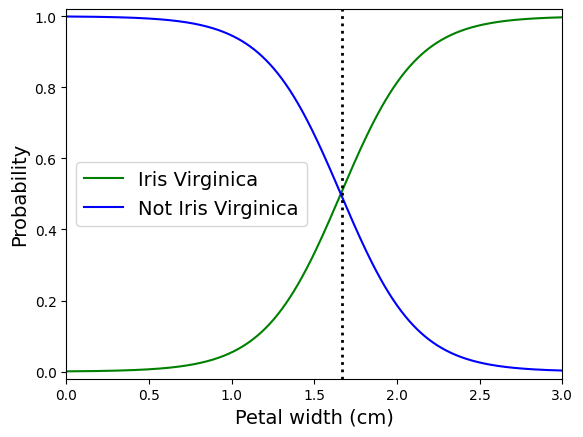

In [17]:
import matplotlib.pyplot as plt

# Show in a plot the probability of iris virginica as a function of the petal width (green solid line),
# The probability of not being iris virginica (blue dashed line), and the threshold value used by the model to separate both classes.
plt.plot(X_new, y_probab[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_probab[:, 0], "b-", label= "Not Iris Virginica")
decision_boundary = X_new[y_probab[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

So, if we sample the *petal width* at upper (1.75 cm) and lower (1.55 cm) than boundary line at around ~1.6 cm, we are going to get Iris Virginica (class=1) and not Iris Virginica flowers (class=0), respectively.

In [18]:
log_reg.predict([[1.75], [1.55]])

array([1, 0], dtype=int32)

Third and last example, where we go back to the **original dataset** but this time we partition it into training and test to evaluate the logistic regression we will build upon training data.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

log_reg = LogisticRegression(max_iter=1000) # Use this hyperparameter to ensure convergence and avoid computing resource problems.
log_reg.fit(X_train, y_train)

test_predictions = log_reg.predict(X_test)

score = log_reg.score(X_test, y_test) # Calculate the model's predictive power on the test set as the % of correct predictions.
score

0.9736842105263158

# Homework

1. จงสร้างโมเดล Logistic Regression ที่รับค่า Input เป็นคอลลัมดังต่อไปนี้ ['pH', 'density', 'alcohol'] โดยให้นำ Input ไป Scale ผ่าน Standard Scaler เเละ Output เป็นเกณฑ์ว่า 'quality' ของ ข้อมูลมากกว่า 5.0 หรือไม่ พร้อมทั้งแสดงค่า loss ที่ได้ทั้ง MSE และ BCE (ค่า loss ในแต่ละ iteration) ในรูปแบบของกราฟ เเละเเสดงผลค่า Accuracy ที่ได้จากการใช้ loss ทั้ง 2 รูปแบบ พร้อมทั้งระบุว่าในโจทย์นี้เราควรใช้ loss รูปแบบใดและเพราะอะไร

In [20]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")
folder_path = path
print(os.listdir(folder_path)) # เลือก "['wineQualityReds.csv']"

csv_path = os.path.join(folder_path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)

df.head()

100%|██████████| 29.4k/29.4k [00:00<00:00, 8.45MB/s]

Extracting files...
['wineQualityReds.csv', 'wineQualityInfo.txt']


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
